In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Sampling imports
from numpy import genfromtxt
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['creditcard', 'creditcard.csv']


In [3]:
LABELS = ["Normal","Fraud"]


In [4]:
#reading dataset
card_data = pd.read_csv("../input/creditcard.csv")
card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
#confirm there are no null values
card_data.isnull().values.any()

False

In [7]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
%matplotlib inline

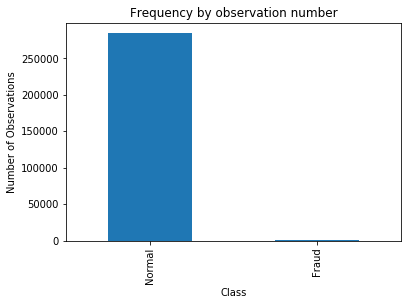

In [11]:
# unbalanced dataset
card_data['Class'].value_counts().plot.bar()
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [12]:
pca = PCA(n_components=2)
#card_data_2d = pd.DataFrame(pca.fit_transform(card_data[:,1:30]))
card_data_2d = pd.DataFrame(pca.fit_transform(card_data.drop(['Amount', 'Class','Time'], axis=1))) 
card_data_2d.head()

,0,1
0,1.359826,0.072213
1,-1.191854,-0.264279
2,1.358352,1.341182
3,0.966252,0.185364
4,1.158231,-0.876616


In [13]:
card_data_2d = pd.concat([card_data_2d, card_data['Class']], axis=1)
card_data_2d.columns

Index([0, 1, 'Class'], dtype='object')

In [14]:
card_data_2d.columns = ['x', 'y', 'class']

In [15]:
card_data_2d.head()

,x,y,class
0,1.359826,0.072213,0
1,-1.191854,-0.264279,0
2,1.358352,1.341182,0
3,0.966252,0.185364,0
4,1.158231,-0.876616,0


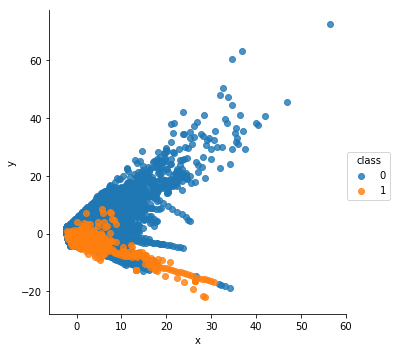

In [16]:
sns.lmplot(x="x",y="y", data=card_data_2d, fit_reg = False, hue="class")

In [17]:
card_data.drop(['Amount', 'Class','Time'], axis=1).head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [18]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(card_data.drop(['Amount', 'Class','Time'], axis=1),card_data['Class'])

In [19]:
labeled_y_resampled =  pd.DataFrame(y_resampled)
labeled_y_resampled.columns=['class']

In [20]:
card_data_oversampled = pd.concat([pd.DataFrame(X_resampled), labeled_y_resampled], axis=1)
card_data_oversampled.shape

(568615, 29)

In [21]:
card_data_oversampled.head()


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


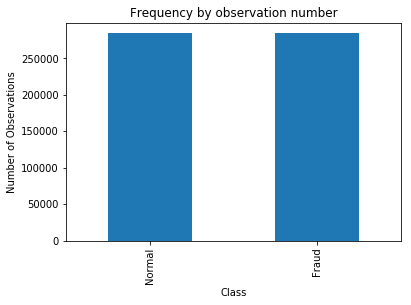

In [22]:
## visual representation of the balanced dataset
card_data_oversampled['class'].value_counts().plot.bar()
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [23]:
## to split data for training 
X = card_data_oversampled.iloc[:,0:28 ].values

In [24]:
#use one-hot encoding for classs labels
y = card_data_oversampled['class']
Y = keras.utils.to_categorical(y,num_classes=None)
Y

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

# Experiment

Hypothesis: A decrese in the number of neurons in the hidden layer will  affect the accuracy of prediction adversly

In [25]:
#Cross Validation using K-Fold method (k =10)
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


Conrtrol Arm with the number of input parameters as the number of neurons in the hidden layer

In [26]:
baseline_history =None
results_control_evaluation_accuracy =[]

In [27]:
#generate 30 samples
for _ in range(0,3):
    seed = _
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    for train, test in kfold.split(X, y):
        model = keras.Sequential()
        model.add(keras.layers.Dense(28, input_shape=(28,), activation='relu' ))
        model.add(keras.layers.Dense(2,  activation='softmax' ))
        model.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
        model.summary()
        baseline_history = model.fit(X[train], keras.utils.to_categorical(y[train],num_classes=None) , epochs=40, verbose=1)
        #print("iteration-{} complete!!!".format(_))
        test_loss, test_acc = model.evaluate(X[test], keras.utils.to_categorical(y[test],num_classes=None))
        results_control_evaluation_accuracy.append(test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                812       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
511753/511753 [==============================] - 25s 49us/step - loss: 0.0569 - acc: 0.9877
Epoch 2/40
511753/511753 [==============================] - 28s 54us/step - loss: 0.0514 - acc: 0.9925
Epoch 3/40
511753/511753 [==============================] - 26s 51us/step - loss: 0.0361 - acc: 0.9944
Epoch 4/40
511753/511753 [==============================] - 26s 51us/step - loss: 0.0351 - acc: 0.9952
Epoch 5/40
511753/511753 [==============================] - 27s 53us/step - loss: 0.0308 - acc: 0.9958
Epoch 6/40
511753/511753 

511753/511753 [==============================] - 21s 41us/step - loss: 0.0237 - acc: 0.9978
Epoch 27/40
511753/511753 [==============================] - 20s 39us/step - loss: 0.0177 - acc: 0.9982
Epoch 28/40
511753/511753 [==============================] - 20s 38us/step - loss: 0.0207 - acc: 0.9980 1s 
Epoch 29/40
511753/511753 [==============================] - 19s 38us/step - loss: 0.0200 - acc: 0.9981
Epoch 30/40
511753/511753 [==============================] - 20s 39us/step - loss: 0.0202 - acc: 0.9981
Epoch 31/40
511753/511753 [==============================] - 19s 38us/step - loss: 0.0199 - acc: 0.9981
Epoch 32/40
511753/511753 [==============================] - 20s 38us/step - loss: 0.0176 - acc: 0.9982
Epoch 33/40
511753/511753 [==============================] - 21s 41us/step - loss: 0.0157 - acc: 0.9984
Epoch 34/40
511753/511753 [==============================] - 20s 38us/step - loss: 0.0151 - acc: 0.9984
Epoch 35/40
511753/511753 [==============================] - 20s 38us/st

511753/511753 [==============================] - 23s 46us/step - loss: 0.0288 - acc: 0.9966 0s - loss: 0.0284
Epoch 11/40
511753/511753 [==============================] - 20s 39us/step - loss: 0.0249 - acc: 0.9970
Epoch 12/40
511753/511753 [==============================] - 20s 39us/step - loss: 0.0292 - acc: 0.9967
Epoch 13/40
511753/511753 [==============================] - 20s 40us/step - loss: 0.0221 - acc: 0.9973
Epoch 14/40
511753/511753 [==============================] - 20s 39us/step - loss: 0.0207 - acc: 0.9974
Epoch 15/40
511753/511753 [==============================] - 20s 39us/step - loss: 0.0232 - acc: 0.9973 0s - loss: 0.0232 - acc:
Epoch 16/40
511753/511753 [==============================] - 21s 41us/step - loss: 0.0210 - acc: 0.9976
Epoch 17/40
511753/511753 [==============================] - 21s 41us/step - loss: 0.0235 - acc: 0.9974
Epoch 18/40
511753/511753 [==============================] - 21s 41us/step - loss: 0.0258 - acc: 0.9973
Epoch 19/40
511753/511753 [======

56862/56862 [==============================] - 1s 18us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
511754/511754 [==============================] - 21s 41us/step - loss: 0.0676 - acc: 0.9877
Epoch 2/40
511754/511754 [==============================] - 21s 41us/step - loss: 0.0415 - acc: 0.9937
Epoch 3/40
511754/511754 [==============================] - 23s 44us/step - loss: 0.0364 - acc: 0.9947
Epoch 4/40
511754/511754 [==============================] - 21s 40us/step - loss: 0.0340 - acc: 0.9953
Epoch 5/40
511754/511754 [==============================] - 21s 41us

511754/511754 [==============================] - 24s 46us/step - loss: 0.0220 - acc: 0.9977
Epoch 26/40
511754/511754 [==============================] - 23s 46us/step - loss: 0.0236 - acc: 0.9975
Epoch 27/40
511754/511754 [==============================] - 24s 48us/step - loss: 0.0208 - acc: 0.9979
Epoch 28/40
511754/511754 [==============================] - 23s 45us/step - loss: 0.0270 - acc: 0.9974
Epoch 29/40
511754/511754 [==============================] - 23s 45us/step - loss: 0.0200 - acc: 0.9980
Epoch 30/40
511754/511754 [==============================] - 24s 46us/step - loss: 0.0204 - acc: 0.9980
Epoch 31/40
511754/511754 [==============================] - 23s 46us/step - loss: 0.0304 - acc: 0.9973
Epoch 32/40
511754/511754 [==============================] - 24s 47us/step - loss: 0.0194 - acc: 0.9980
Epoch 33/40
511754/511754 [==============================] - 25s 50us/step - loss: 0.0201 - acc: 0.9980
Epoch 34/40
511754/511754 [==============================] - 24s 46us/step -

511754/511754 [==============================] - 20s 39us/step - loss: 0.0224 - acc: 0.9975
Epoch 11/40
511754/511754 [==============================] - 20s 40us/step - loss: 0.0262 - acc: 0.9973
Epoch 12/40
511754/511754 [==============================] - 20s 39us/step - loss: 0.0239 - acc: 0.9975
Epoch 13/40
511754/511754 [==============================] - 20s 39us/step - loss: 0.0180 - acc: 0.9978
Epoch 14/40
511754/511754 [==============================] - 20s 39us/step - loss: 0.0259 - acc: 0.9975
Epoch 15/40
511754/511754 [==============================] - 20s 40us/step - loss: 0.0243 - acc: 0.9976
Epoch 16/40
511754/511754 [==============================] - 19s 37us/step - loss: 0.0266 - acc: 0.9975
Epoch 17/40
511754/511754 [==============================] - 19s 38us/step - loss: 0.0246 - acc: 0.9977
Epoch 18/40
511754/511754 [==============================] - 19s 37us/step - loss: 0.0250 - acc: 0.9977
Epoch 19/40
511754/511754 [==============================] - 20s 40us/step -

Epoch 1/40
511753/511753 [==============================] - 19s 38us/step - loss: 0.0656 - acc: 0.9873
Epoch 2/40
511753/511753 [==============================] - 19s 37us/step - loss: 0.0531 - acc: 0.9926
Epoch 3/40
511753/511753 [==============================] - 19s 37us/step - loss: 0.0357 - acc: 0.9947
Epoch 4/40
511753/511753 [==============================] - 19s 37us/step - loss: 0.0300 - acc: 0.9956
Epoch 5/40
511753/511753 [==============================] - 19s 37us/step - loss: 0.0291 - acc: 0.9961
Epoch 6/40
511753/511753 [==============================] - 20s 39us/step - loss: 0.0235 - acc: 0.9967
Epoch 7/40
511753/511753 [==============================] - 19s 37us/step - loss: 0.0249 - acc: 0.9967
Epoch 8/40
511753/511753 [==============================] - 19s 37us/step - loss: 0.0218 - acc: 0.9971
Epoch 9/40
511753/511753 [==============================] - 19s 37us/step - loss: 0.0243 - acc: 0.9969
Epoch 10/40
511753/511753 [==============================] - 19s 37us/ste

511753/511753 [==============================] - 20s 39us/step - loss: 0.0163 - acc: 0.9985
Epoch 33/40
511753/511753 [==============================] - 20s 40us/step - loss: 0.0213 - acc: 0.9981
Epoch 34/40
511753/511753 [==============================] - 21s 40us/step - loss: 0.0199 - acc: 0.9981
Epoch 35/40
511753/511753 [==============================] - 20s 40us/step - loss: 0.0185 - acc: 0.9984
Epoch 36/40
511753/511753 [==============================] - 21s 40us/step - loss: 0.0189 - acc: 0.9983
Epoch 37/40
511753/511753 [==============================] - 20s 40us/step - loss: 0.0203 - acc: 0.9982
Epoch 38/40
511753/511753 [==============================] - 20s 40us/step - loss: 0.0208 - acc: 0.9981
Epoch 39/40
511753/511753 [==============================] - 20s 40us/step - loss: 0.0162 - acc: 0.9985
Epoch 40/40
56862/56862 [==============================] - 1s 20us/step
_________________________________________________________________
Layer (type)                 Output Shape 

511753/511753 [==============================] - 22s 42us/step - loss: 0.0381 - acc: 0.9968
Epoch 18/40
511753/511753 [==============================] - 22s 43us/step - loss: 0.0266 - acc: 0.9975
Epoch 19/40
511753/511753 [==============================] - 23s 44us/step - loss: 0.0342 - acc: 0.9970
Epoch 20/40
511753/511753 [==============================] - 21s 42us/step - loss: 0.0265 - acc: 0.9975
Epoch 21/40
511753/511753 [==============================] - 22s 42us/step - loss: 0.0294 - acc: 0.9975
Epoch 22/40
511753/511753 [==============================] - 21s 42us/step - loss: 0.0238 - acc: 0.9977
Epoch 23/40
511753/511753 [==============================] - 21s 42us/step - loss: 0.0208 - acc: 0.9980
Epoch 24/40
511753/511753 [==============================] - 22s 43us/step - loss: 0.0207 - acc: 0.9982
Epoch 25/40
511753/511753 [==============================] - 22s 43us/step - loss: 0.0260 - acc: 0.9977
Epoch 26/40
511753/511753 [==============================] - 22s 42us/step -

511754/511754 [==============================] - 20s 40us/step - loss: 0.0476 - acc: 0.9936
Epoch 4/40
511754/511754 [==============================] - 20s 39us/step - loss: 0.0425 - acc: 0.9944
Epoch 5/40
511754/511754 [==============================] - 20s 38us/step - loss: 0.0491 - acc: 0.9944
Epoch 6/40
511754/511754 [==============================] - 20s 39us/step - loss: 0.0415 - acc: 0.9955
Epoch 7/40
511754/511754 [==============================] - 21s 40us/step - loss: 0.0389 - acc: 0.9955
Epoch 8/40
511754/511754 [==============================] - 21s 41us/step - loss: 0.0319 - acc: 0.9963
Epoch 9/40
511754/511754 [==============================] - 21s 40us/step - loss: 0.0450 - acc: 0.9956
Epoch 10/40
511754/511754 [==============================] - 21s 40us/step - loss: 0.0337 - acc: 0.9963
Epoch 11/40
511754/511754 [==============================] - 20s 39us/step - loss: 0.0309 - acc: 0.9966
Epoch 12/40
511754/511754 [==============================] - 20s 39us/step - loss:

511754/511754 [==============================] - 22s 43us/step - loss: 0.0147 - acc: 0.9986
Epoch 34/40
511754/511754 [==============================] - 21s 42us/step - loss: 0.0190 - acc: 0.9982
Epoch 35/40
511754/511754 [==============================] - 21s 40us/step - loss: 0.0173 - acc: 0.9984
Epoch 36/40
511754/511754 [==============================] - 21s 41us/step - loss: 0.0248 - acc: 0.9979
Epoch 37/40
511754/511754 [==============================] - 21s 40us/step - loss: 0.0200 - acc: 0.9982
Epoch 38/40
511754/511754 [==============================] - 20s 40us/step - loss: 0.0215 - acc: 0.9982
Epoch 39/40
511754/511754 [==============================] - 22s 42us/step - loss: 0.0245 - acc: 0.9980
Epoch 40/40
56861/56861 [==============================] - 1s 20us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 28)                812       
______________

511754/511754 [==============================] - 21s 40us/step - loss: 0.0146 - acc: 0.9984
Epoch 20/40
511754/511754 [==============================] - 20s 40us/step - loss: 0.0169 - acc: 0.9983
Epoch 21/40
511754/511754 [==============================] - 20s 40us/step - loss: 0.0130 - acc: 0.9986
Epoch 22/40
511754/511754 [==============================] - 21s 40us/step - loss: 0.0123 - acc: 0.9986
Epoch 23/40
511754/511754 [==============================] - 20s 40us/step - loss: 0.0130 - acc: 0.9985
Epoch 24/40
511754/511754 [==============================] - 20s 40us/step - loss: 0.0181 - acc: 0.9983
Epoch 25/40
511754/511754 [==============================] - 22s 42us/step - loss: 0.0171 - acc: 0.9984
Epoch 26/40
511754/511754 [==============================] - 21s 41us/step - loss: 0.0173 - acc: 0.9983
Epoch 27/40
511754/511754 [==============================] - 20s 40us/step - loss: 0.0137 - acc: 0.9985 0s - loss: 0.0138 - a
Epoch 28/40
511754/511754 [===========================

511753/511753 [==============================] - 22s 44us/step - loss: 0.0327 - acc: 0.9956
Epoch 6/40
511753/511753 [==============================] - 22s 43us/step - loss: 0.0291 - acc: 0.9961
Epoch 7/40
511753/511753 [==============================] - 22s 43us/step - loss: 0.0290 - acc: 0.9961
Epoch 8/40
511753/511753 [==============================] - 22s 44us/step - loss: 0.0254 - acc: 0.9966
Epoch 9/40
511753/511753 [==============================] - 22s 43us/step - loss: 0.0266 - acc: 0.9967
Epoch 10/40
511753/511753 [==============================] - 23s 44us/step - loss: 0.0241 - acc: 0.9969
Epoch 11/40
511753/511753 [==============================] - 22s 44us/step - loss: 0.0236 - acc: 0.9972
Epoch 12/40
511753/511753 [==============================] - 22s 43us/step - loss: 0.0227 - acc: 0.9973
Epoch 13/40
511753/511753 [==============================] - 22s 44us/step - loss: 0.0187 - acc: 0.9977
Epoch 14/40
511753/511753 [==============================] - 22s 43us/step - los

511753/511753 [==============================] - 22s 43us/step - loss: 0.0155 - acc: 0.9985
Epoch 37/40
511753/511753 [==============================] - 22s 44us/step - loss: 0.0191 - acc: 0.9984
Epoch 38/40
511753/511753 [==============================] - 24s 46us/step - loss: 0.0181 - acc: 0.9984
Epoch 39/40
511753/511753 [==============================] - 24s 47us/step - loss: 0.0178 - acc: 0.9984
Epoch 40/40
56862/56862 [==============================] - 1s 25us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
511753/511753 [==============================] - 29s 

511753/511753 [==============================] - 28s 56us/step - loss: 0.0221 - acc: 0.9980
Epoch 21/40
511753/511753 [==============================] - 27s 53us/step - loss: 0.0216 - acc: 0.9980
Epoch 22/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0259 - acc: 0.9976
Epoch 23/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0216 - acc: 0.9979
Epoch 24/40
511753/511753 [==============================] - 27s 53us/step - loss: 0.0185 - acc: 0.9982
Epoch 25/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0212 - acc: 0.9980
Epoch 26/40
511753/511753 [==============================] - 27s 53us/step - loss: 0.0199 - acc: 0.9982
Epoch 27/40
511753/511753 [==============================] - 27s 53us/step - loss: 0.0209 - acc: 0.9982
Epoch 28/40
511753/511753 [==============================] - 28s 54us/step - loss: 0.0225 - acc: 0.9981
Epoch 29/40
511753/511753 [==============================] - 28s 54us/step -

511754/511754 [==============================] - 29s 57us/step - loss: 0.0432 - acc: 0.9951
Epoch 6/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0361 - acc: 0.9959
Epoch 7/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0334 - acc: 0.9963
Epoch 8/40
511754/511754 [==============================] - 33s 65us/step - loss: 0.0356 - acc: 0.9961
Epoch 9/40
511754/511754 [==============================] - 29s 57us/step - loss: 0.0291 - acc: 0.9968
Epoch 10/40
511754/511754 [==============================] - 32s 62us/step - loss: 0.0391 - acc: 0.9963
Epoch 11/40
511754/511754 [==============================] - 27s 53us/step - loss: 0.0419 - acc: 0.9961
Epoch 12/40
511754/511754 [==============================] - 29s 57us/step - loss: 0.0319 - acc: 0.9968
Epoch 13/40
511754/511754 [==============================] - 28s 55us/step - loss: 0.0281 - acc: 0.9972
Epoch 14/40
511754/511754 [==============================] - 30s 58us/step - los

511754/511754 [==============================] - 80s 156us/step - loss: 0.0276 - acc: 0.9977
Epoch 37/40
511754/511754 [==============================] - 82s 160us/step - loss: 0.0263 - acc: 0.9977
Epoch 38/40
511754/511754 [==============================] - 80s 157us/step - loss: 0.0269 - acc: 0.9977
Epoch 39/40
511754/511754 [==============================] - 90s 176us/step - loss: 0.0264 - acc: 0.9977
Epoch 40/40
56861/56861 [==============================] - 6s 98us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
511754/511754 [==============================] - 

511754/511754 [==============================] - 67s 131us/step - loss: 0.0155 - acc: 0.9984
Epoch 22/40
511754/511754 [==============================] - 65s 127us/step - loss: 0.0156 - acc: 0.9983
Epoch 23/40
511754/511754 [==============================] - 68s 132us/step - loss: 0.0137 - acc: 0.9985
Epoch 24/40
511754/511754 [==============================] - 69s 135us/step - loss: 0.0175 - acc: 0.9982
Epoch 25/40
511754/511754 [==============================] - 72s 141us/step - loss: 0.0140 - acc: 0.9985
Epoch 26/40
511754/511754 [==============================] - 67s 131us/step - loss: 0.0185 - acc: 0.9982
Epoch 27/40
511754/511754 [==============================] - 67s 131us/step - loss: 0.0156 - acc: 0.9984
Epoch 28/40
511754/511754 [==============================] - 64s 126us/step - loss: 0.0152 - acc: 0.9984
Epoch 29/40
511754/511754 [==============================] - 64s 126us/step - loss: 0.0169 - acc: 0.9984
Epoch 30/40
511754/511754 [==============================] - 68s 13

In [35]:
results_control_evaluation_accuracy

[0.99813583764201053,
 0.99695754634026235,
 0.99885688157293095,
 0.99788962751925714,
 0.99829411557806624,
 0.99880410122931362,
 0.99825891208385364,
 0.99570883382283115,
 0.99889203496245227,
 0.9985754735231529,
 0.99797755970595481,
 0.99906791882100521,
 0.99859308501283806,
 0.9983820477647638,
 0.99845239351412196,
 0.99854030002989747,
 0.99859306026978067,
 0.99665851814072914,
 0.99453052179877244,
 0.99729164101932788,
 0.99876894938623328,
 0.99834687489008478,
 0.99852273926348001,
 0.99894481375962862,
 0.99820618339136857,
 0.99736198800583875,
 0.99787200365804329,
 0.99824132533722587,
 0.99861064701640845,
 0.99848753979001426]

Experimental Arm with reduced number of neurons in the hidden layer

In [39]:
experiment_history = None
results_experiment_evaluation_accuracy= []

In [42]:
#generate 30 samples
for _ in range(0,3):
    seed = _
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    for train, test in kfold.split(X, y):
        model = keras.Sequential()
        model.add(keras.layers.Dense(19, input_shape=(28,), activation='relu' ))
        model.add(keras.layers.Dense(2,  activation='softmax' ))
        model.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
        model.summary()
        experiment_history = model.fit(X[train], keras.utils.to_categorical(y[train],num_classes=None) , epochs=40, verbose=1)
        #print("iteration-{} complete!!!".format(_))
        test_loss, test_acc = model.evaluate(X[test], keras.utils.to_categorical(y[test],num_classes=None))
        results_experiment_evaluation_accuracy.append(test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 19)                551       
_________________________________________________________________
dense_125 (Dense)            (None, 2)                 40        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
511753/511753 [==============================] - 33s 65us/step - loss: 0.0602 - acc: 0.9863
Epoch 2/40
511753/511753 [==============================] - 28s 55us/step - loss: 0.0514 - acc: 0.9920
Epoch 3/40
511753/511753 [==============================] - 29s 56us/step - loss: 0.0420 - acc: 0.9935
Epoch 4/40
511753/511753 [==============================] - 28s 55us/step - loss: 0.0298 - acc: 0.9951
Epoch 5/40
511753/511753 [==============================] - 28s 55us/step - loss: 0.0299 - acc: 0.9955
Epoch 6/40
511753/511753 

511753/511753 [==============================] - 31s 60us/step - loss: 0.0131 - acc: 0.9986
Epoch 28/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0172 - acc: 0.9982
Epoch 29/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0145 - acc: 0.9983
Epoch 30/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0214 - acc: 0.9979
Epoch 31/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0178 - acc: 0.9982
Epoch 32/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0184 - acc: 0.9982
Epoch 33/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0141 - acc: 0.9985
Epoch 34/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0143 - acc: 0.9985
Epoch 35/40
511753/511753 [==============================] - 32s 62us/step - loss: 0.0203 - acc: 0.9981
Epoch 36/40
511753/511753 [==============================] - 30s 59us/step -

511753/511753 [==============================] - 31s 61us/step - loss: 0.0274 - acc: 0.9967
Epoch 14/40
511753/511753 [==============================] - 32s 63us/step - loss: 0.0267 - acc: 0.9968
Epoch 15/40
511753/511753 [==============================] - 33s 64us/step - loss: 0.0217 - acc: 0.9971
Epoch 16/40
511753/511753 [==============================] - 32s 62us/step - loss: 0.0268 - acc: 0.9968
Epoch 17/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0293 - acc: 0.9966
Epoch 18/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0262 - acc: 0.9969
Epoch 19/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0355 - acc: 0.9965
Epoch 20/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0267 - acc: 0.9968
Epoch 21/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0213 - acc: 0.9973
Epoch 22/40
511753/511753 [==============================] - 34s 66us/step -

Epoch 1/40
511754/511754 [==============================] - 34s 66us/step - loss: 0.0582 - acc: 0.9869
Epoch 2/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0356 - acc: 0.9939
Epoch 3/40
511754/511754 [==============================] - 30s 60us/step - loss: 0.0315 - acc: 0.9949
Epoch 4/40
511754/511754 [==============================] - 30s 58us/step - loss: 0.0262 - acc: 0.9957
Epoch 5/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0285 - acc: 0.9958
Epoch 6/40
511754/511754 [==============================] - 30s 60us/step - loss: 0.0288 - acc: 0.9960
Epoch 7/40
511754/511754 [==============================] - 30s 58us/step - loss: 0.0273 - acc: 0.9964
Epoch 8/40
511754/511754 [==============================] - 27s 52us/step - loss: 0.0231 - acc: 0.9969
Epoch 9/40
511754/511754 [==============================] - 26s 52us/step - loss: 0.0251 - acc: 0.9968
Epoch 10/40
511754/511754 [==============================] - 26s 51us/ste

511754/511754 [==============================] - 30s 59us/step - loss: 0.0253 - acc: 0.9971
Epoch 34/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0257 - acc: 0.9971
Epoch 35/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0274 - acc: 0.9970
Epoch 36/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0242 - acc: 0.9972
Epoch 37/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0266 - acc: 0.9971
Epoch 38/40
511754/511754 [==============================] - 30s 58us/step - loss: 0.0325 - acc: 0.9968
Epoch 39/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0273 - acc: 0.9970
Epoch 40/40
56861/56861 [==============================] - 3s 57us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 19)                551       
______________

511754/511754 [==============================] - 29s 56us/step - loss: 0.0238 - acc: 0.9972
Epoch 20/40
511754/511754 [==============================] - 30s 58us/step - loss: 0.0311 - acc: 0.9968
Epoch 21/40
511754/511754 [==============================] - 29s 56us/step - loss: 0.0257 - acc: 0.9971
Epoch 22/40
511754/511754 [==============================] - 29s 56us/step - loss: 0.0243 - acc: 0.9973
Epoch 23/40
511754/511754 [==============================] - 29s 57us/step - loss: 0.0307 - acc: 0.9969
Epoch 24/40
511754/511754 [==============================] - 29s 56us/step - loss: 0.0232 - acc: 0.9974
Epoch 25/40
511754/511754 [==============================] - 29s 56us/step - loss: 0.0253 - acc: 0.9974
Epoch 26/40
511754/511754 [==============================] - 29s 56us/step - loss: 0.0276 - acc: 0.9973
Epoch 27/40
511754/511754 [==============================] - 29s 56us/step - loss: 0.0334 - acc: 0.9970
Epoch 28/40
511754/511754 [==============================] - 29s 57us/step -

511753/511753 [==============================] - 31s 60us/step - loss: 0.0311 - acc: 0.9957
Epoch 5/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0203 - acc: 0.9968
Epoch 6/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0217 - acc: 0.9970
Epoch 7/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0208 - acc: 0.9971
Epoch 8/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0236 - acc: 0.9971
Epoch 9/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0229 - acc: 0.9972
Epoch 10/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0182 - acc: 0.9976
Epoch 11/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0196 - acc: 0.9975
Epoch 12/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0244 - acc: 0.9975
Epoch 13/40
511753/511753 [==============================] - 31s 60us/step - loss

511753/511753 [==============================] - 31s 61us/step - loss: 0.0224 - acc: 0.9979
Epoch 37/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0189 - acc: 0.9980
Epoch 38/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0182 - acc: 0.9981
Epoch 39/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0194 - acc: 0.9980
Epoch 40/40
56862/56862 [==============================] - 4s 62us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 19)                551       
_________________________________________________________________
dense_149 (Dense)            (None, 2)                 40        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
511753/511753 [==============================] - 35s 

511753/511753 [==============================] - 36s 70us/step - loss: 0.0166 - acc: 0.9982
Epoch 22/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0157 - acc: 0.9981
Epoch 23/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0164 - acc: 0.9982
Epoch 24/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0172 - acc: 0.9982
Epoch 25/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0175 - acc: 0.9981
Epoch 26/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0197 - acc: 0.9979
Epoch 27/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0175 - acc: 0.9980
Epoch 28/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0161 - acc: 0.9981
Epoch 29/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0215 - acc: 0.9980
Epoch 30/40
511753/511753 [==============================] - 30s 58us/step -

511754/511754 [==============================] - 31s 61us/step - loss: 0.0316 - acc: 0.9958
Epoch 7/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0274 - acc: 0.9962
Epoch 8/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0211 - acc: 0.9970
Epoch 9/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0240 - acc: 0.9968
Epoch 10/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0222 - acc: 0.9970
Epoch 11/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0216 - acc: 0.9971
Epoch 12/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0210 - acc: 0.9972
Epoch 13/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0205 - acc: 0.9973
Epoch 14/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0208 - acc: 0.9973
Epoch 15/40
511754/511754 [==============================] - 31s 60us/step - lo

511754/511754 [==============================] - 30s 59us/step - loss: 0.0205 - acc: 0.9979
Epoch 38/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0171 - acc: 0.9981
Epoch 39/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0181 - acc: 0.9981
Epoch 40/40
56861/56861 [==============================] - 3s 58us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 19)                551       
_________________________________________________________________
dense_159 (Dense)            (None, 2)                 40        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
511754/511754 [==============================] - 34s 66us/step - loss: 0.0560 - acc: 0.9872
Epoch 2/40
511754/511754 [==============================] - 31s 6

511754/511754 [==============================] - 31s 60us/step - loss: 0.0192 - acc: 0.9979
Epoch 23/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0180 - acc: 0.9979
Epoch 24/40
511754/511754 [==============================] - 31s 61us/step - loss: 0.0170 - acc: 0.9980
Epoch 25/40
511754/511754 [==============================] - 31s 61us/step - loss: 0.0163 - acc: 0.9980
Epoch 26/40
511754/511754 [==============================] - 31s 61us/step - loss: 0.0144 - acc: 0.9983
Epoch 27/40
511754/511754 [==============================] - 31s 61us/step - loss: 0.0223 - acc: 0.9978
Epoch 28/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0186 - acc: 0.9981
Epoch 29/40
511754/511754 [==============================] - 33s 65us/step - loss: 0.0166 - acc: 0.9982
Epoch 30/40
511754/511754 [==============================] - 33s 65us/step - loss: 0.0148 - acc: 0.9983 0s - loss: 0.01
Epoch 31/40
511754/511754 [==============================] -

511753/511753 [==============================] - 29s 57us/step - loss: 0.0261 - acc: 0.9964 0s - loss: 0.0259 - acc
Epoch 8/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0250 - acc: 0.9965
Epoch 9/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0267 - acc: 0.9965
Epoch 10/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0295 - acc: 0.9963
Epoch 11/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0282 - acc: 0.9966
Epoch 12/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0264 - acc: 0.9966
Epoch 13/40
511753/511753 [==============================] - 29s 56us/step - loss: 0.0244 - acc: 0.9969
Epoch 14/40
511753/511753 [==============================] - 29s 56us/step - loss: 0.0261 - acc: 0.9969
Epoch 15/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0230 - acc: 0.9971
Epoch 16/40
511753/511753 [===========================

511753/511753 [==============================] - 31s 60us/step - loss: 0.0217 - acc: 0.9979
Epoch 38/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0221 - acc: 0.9978
Epoch 39/40
511753/511753 [==============================] - 30s 59us/step - loss: 0.0224 - acc: 0.9977
Epoch 40/40
56862/56862 [==============================] - 3s 59us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 19)                551       
_________________________________________________________________
dense_169 (Dense)            (None, 2)                 40        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
511753/511753 [==============================] - 34s 67us/step - loss: 0.0591 - acc: 0.9873
Epoch 2/40
511753/511753 [==============================] - 30s 5

511753/511753 [==============================] - 30s 59us/step - loss: 0.0367 - acc: 0.9963
Epoch 23/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0342 - acc: 0.9964
Epoch 24/40
511753/511753 [==============================] - 29s 58us/step - loss: 0.0270 - acc: 0.9970
Epoch 25/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0232 - acc: 0.9972 0s - loss: 0.0233 - acc: 
Epoch 26/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0265 - acc: 0.9970
Epoch 27/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0247 - acc: 0.9973
Epoch 28/40
511753/511753 [==============================] - 30s 58us/step - loss: 0.0274 - acc: 0.9971
Epoch 29/40
511753/511753 [==============================] - 29s 57us/step - loss: 0.0302 - acc: 0.9968
Epoch 30/40
511753/511753 [==============================] - 31s 60us/step - loss: 0.0229 - acc: 0.9973
Epoch 31/40
511753/511753 [=======================

511754/511754 [==============================] - 30s 59us/step - loss: 0.0317 - acc: 0.9956
Epoch 7/40
511754/511754 [==============================] - 30s 58us/step - loss: 0.0295 - acc: 0.9960
Epoch 8/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0275 - acc: 0.9963
Epoch 9/40
511754/511754 [==============================] - 30s 58us/step - loss: 0.0255 - acc: 0.9965
Epoch 10/40
511754/511754 [==============================] - 34s 67us/step - loss: 0.0241 - acc: 0.9967
Epoch 11/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0271 - acc: 0.9966
Epoch 12/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0263 - acc: 0.9967
Epoch 13/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0223 - acc: 0.9971
Epoch 14/40
511754/511754 [==============================] - 31s 60us/step - loss: 0.0231 - acc: 0.9970
Epoch 15/40
511754/511754 [==============================] - 30s 59us/step - lo

511754/511754 [==============================] - 30s 58us/step - loss: 0.0657 - acc: 0.9958
Epoch 38/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0510 - acc: 0.9966
Epoch 39/40
511754/511754 [==============================] - 30s 59us/step - loss: 0.0433 - acc: 0.9970
Epoch 40/40
56861/56861 [==============================] - 3s 61us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 19)                551       
_________________________________________________________________
dense_179 (Dense)            (None, 2)                 40        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
511754/511754 [==============================] - 33s 65us/step - loss: 0.0551 - acc: 0.9880
Epoch 2/40
511754/511754 [==============================] - 30s 6

511754/511754 [==============================] - 33s 64us/step - loss: 0.0213 - acc: 0.9975
Epoch 22/40
511754/511754 [==============================] - 33s 64us/step - loss: 0.0253 - acc: 0.9974
Epoch 23/40
511754/511754 [==============================] - 32s 63us/step - loss: 0.0226 - acc: 0.9976
Epoch 24/40
511754/511754 [==============================] - 33s 65us/step - loss: 0.0209 - acc: 0.9977
Epoch 25/40
511754/511754 [==============================] - 33s 64us/step - loss: 0.0189 - acc: 0.9979
Epoch 26/40
511754/511754 [==============================] - 33s 65us/step - loss: 0.0174 - acc: 0.9981
Epoch 27/40
511754/511754 [==============================] - 32s 63us/step - loss: 0.0166 - acc: 0.9982
Epoch 28/40
511754/511754 [==============================] - 33s 64us/step - loss: 0.0227 - acc: 0.9978 0s - loss: 0.0226 - acc: 0
Epoch 29/40
511754/511754 [==============================] - 33s 65us/step - loss: 0.0189 - acc: 0.9980
Epoch 30/40
511754/511754 [======================

In [43]:
results_experiment_evaluation_accuracy

[0.99732686152439243,
 0.99876894938623328,
 0.99857549857549854,
 0.98243114909781581,
 0.99831170201540576,
 0.99753785547211626,
 0.9975730289653717,
 0.99889203496245227,
 0.99831167232373685,
 0.99794235064455428,
 0.9986458443248567,
 0.99827652914072662,
 0.99852273926348001,
 0.99861067145017768,
 0.99839963420210331,
 0.99845236629675871,
 0.99834684581699229,
 0.9982237385905981,
 0.99803028437769292,
 0.99815339160408711,
 0.9986458443248567,
 0.99855791213815903,
 0.99590236009989097,
 0.99753789877246668,
 0.99857549857549854,
 0.99862823376303622,
 0.99577918080934213,
 0.99882168797594129,
 0.99843477955013105,
 0.99834684581699229]

In [44]:
#saving results
pd.DataFrame(results_control_evaluation_accuracy).to_csv('results_control_evaluation_accuracy.csv', index=False)
pd.DataFrame(results_experiment_evaluation_accuracy).to_csv('results_experiment_evaluation_accuracy.csv', index=False)

RESULT ANALYSIS

In [45]:
control = pd.DataFrame(results_control_evaluation_accuracy)
experiment = pd.DataFrame(results_experiment_evaluation_accuracy)

In [46]:
##Basic Stats
mean_control_accuracy = control.mean()
print("Mean Control Accuracy: {}".format(mean_control_accuracy))

mean_experimental_accuracy = experiment.mean()
print("Mean Experimental Accuracy: {}".format(mean_experimental_accuracy))

Mean Control Accuracy: 0    0.998061
dtype: float64
Mean Experimental Accuracy: 0    0.997619
dtype: float64


In [47]:
##Checking standard deviation of the results
std_control_accuracy = control.std()
print("Standard Deviation of Control Accuracy Results: {}".format(std_control_accuracy))

std_experimental_accuracy = experiment.std()
print("Standard Deviation of Experimental Accuracy Results: {}".format(std_experimental_accuracy))

Standard Deviation of Control Accuracy Results: 0    0.000996
dtype: float64
Standard Deviation of Experimental Accuracy Results: 0    0.002962
dtype: float64


In [48]:
results_accuracy= pd.concat([control, experiment], axis=1)
results_accuracy.columns = ['Control', 'Experimental']
results_accuracy.head()

,Control,Experimental
0,0.998136,0.997327
1,0.996958,0.998769
2,0.998857,0.998575
3,0.997890,0.982431
4,0.998294,0.998312


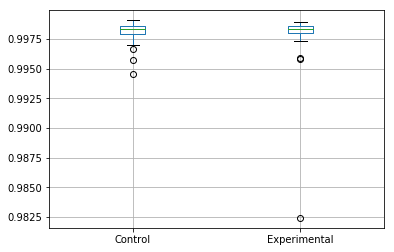

In [49]:
#To calculate 5 parameter representation of results using boxplots
results_accuracy.boxplot()

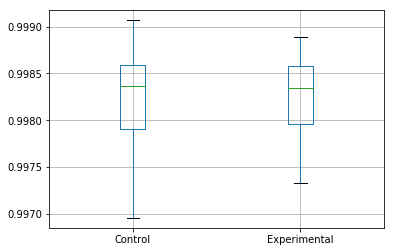

In [50]:
#taking away outliers
results_accuracy.boxplot(showfliers=False)

In [51]:
from scipy import stats
s, p = stats.wilcoxon(control[0], experiment[0])

if p < 0.05:
  print('null hypothesis rejected, significant difference between the data-sets')
else:
  print('null hypothesis accepted, no significant difference between the data-sets')

null hypothesis accepted, no significant difference between the data-sets
